## Regression model for Summer 22_Football Transfers Dataset


### Table of Contents
<ul>
<li><a href="#import">1) Importing packages and Dataset</a></li>
    
    
<li><a href="#d1">2) Data Preprocessing: </a>
      <ul>  
<li><a href="#d1">a) Checking our data</a></li> 
<li><a href="#d2">b) Cleaning our data</a></li>
<li><a href="#d3">c) Encoding our data</a></li>
     </ul>    </li> 

<li><a href="#knn1">3) Regression</a>
    <ul>    
  
<li><a href="#knn1">a) Gradient Boosting using SKLearn</a></li>
    </ul></li>
<li><a href="#knn1">b) Evaluation of the model</a></li>
    </ul></li> 

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np

In [1]:
np.random.seed(300) # To give constant result 

<IPython.core.display.Javascript object>

## Reading File

In [2]:
df=pd.read_csv('Summer22_FootballTransfers.csv')

<IPython.core.display.Javascript object>

<a id='Data Wrangling1'></a>
## Data Preprocessing
#### 1) Checking our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33625 entries, 0 to 33624
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33620 non-null  object 
 1   position             33615 non-null  object 
 2   age                  33477 non-null  float64
 3   origin_club          33620 non-null  object 
 4   league_origin_club   32685 non-null  object 
 5   country_origin_club  32690 non-null  object 
 6   new_club             33615 non-null  object 
 7   league_new_club      28047 non-null  object 
 8   country_new_club     28051 non-null  object 
 9   cost                 33621 non-null  object 
 10  date_of_transfer     33625 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [5]:
print('data shape is ',df.shape)

data shape is  (33625, 11)


In [6]:
# Cheching if there are duplicated rows
print('There is {} duplicated rows'.format(df.duplicated().sum()))

# Cheching if there are Nulvalues
print('{} of data is NuLL'.format(
    str(round(df.isna().sum().sum() / df.size * 100))+'%'))

There is 0 duplicated rows
4% of data is NuLL


In [7]:
# drop NunValues.
df = df.dropna()
df = df.reset_index(drop=True)

In [8]:
# Cheching our data
df.head(2)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,€42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,€18.00m,9/1/2022


<a id='d2'></a>
#### 2) Cleaning our data


In [9]:
# Converting cost column from str to float
# df["cost"]

df["cost"] = df["cost"].str.replace("Th.", "000", regex=True)
df["cost"] = df["cost"].str.replace("m", "000000", regex=True)
df["cost"] = df["cost"].str.replace(".", "", regex=True)
df["cost"] = df["cost"].str.replace("€", "", regex=True)
df['cost'] = df['cost'].astype('float')

df["cost"] = df["cost"]/1e+06 # scaling cost column

# df['date_of_transfer']
df['month'] = pd.DatetimeIndex(df['date_of_transfer']).month # Extracting Month from Date of transfer.

<IPython.core.display.Javascript object>

In [10]:
# show column age and new club with group by
df_age = df.groupby('age')['cost'].sum()
df_age = df_age.sort_values(ascending=False)
print(df_age)

df_new_club = df.groupby('new_club')['cost'].sum()
df_new_club = df_new_club.sort_values(ascending=False)

df_position = df.groupby('position')['cost'].sum()
df_position = df_position.sort_values(ascending=False)
print(df_position)

age
25.0    141518.915
24.0    124610.405
22.0    117016.830
26.0    104478.110
23.0     86524.190
21.0     84872.125
27.0     84299.690
29.0     70316.045
28.0     67759.450
20.0     62707.015
30.0     48348.735
19.0     31471.985
31.0     26862.635
33.0     18616.070
18.0     15435.460
32.0     15054.160
34.0      4853.865
35.0      3290.925
17.0      1184.460
37.0       458.365
36.0       168.680
39.0       102.615
38.0         4.290
16.0         2.960
40.0         1.180
41.0         0.260
42.0         0.260
43.0         0.150
15.0         0.055
45.0         0.010
Name: cost, dtype: float64
position
Centre-Forward        219638.365
Centre-Back           189401.615
Central Midfield      146054.295
Left Winger           104577.655
Defensive Midfield     93753.360
Right Winger           85331.315
Left-Back              75724.170
Attacking Midfield     74613.460
Right-Back             53624.610
Goalkeeper             40027.160
Second Striker         17133.080
Left Midfield           507

In [11]:
# df['position']

"""
attack -> Centre-Forward
defence -> Centre-Back
midfield -> Central Midfield
"""
# Handling Position column 
df['position'].replace('attack', 'Centre-Forward', inplace=True)
df['position'].replace('defence', 'Centre-Back', inplace=True)
df['position'].replace('midfield', 'Central Midfield', inplace=True)

In [12]:
df.head(2)

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer,month
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,4200.0,9/1/2022,9
1,Umar Sadiq,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,1800.0,9/1/2022,9


In [13]:
df = df.drop(columns=["name", "date_of_transfer"], axis=1) # drop some columns

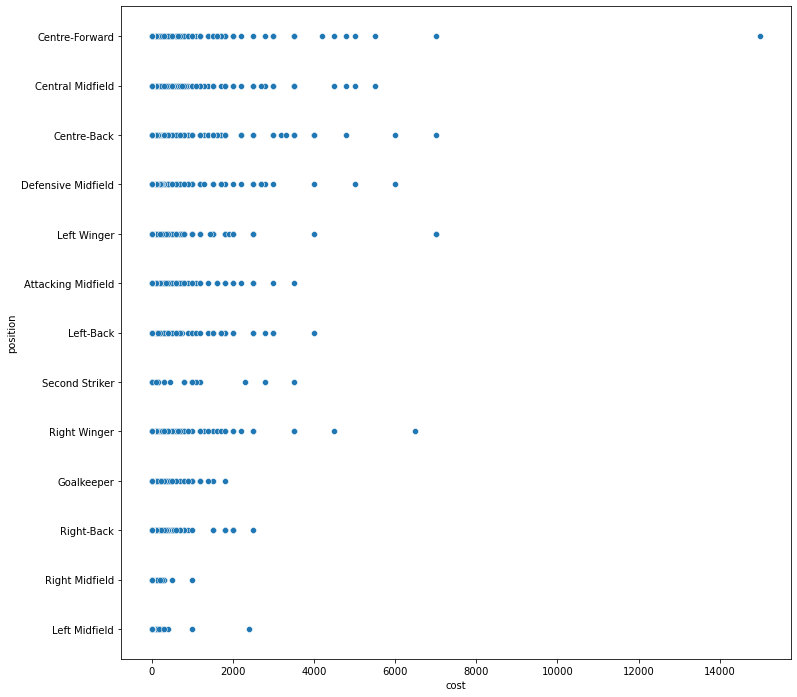

In [15]:
# check outliers for each position 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, y="position", x="cost", legend=False, sizes=(20, 2000))

# show the graph
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of transfers by cost range')

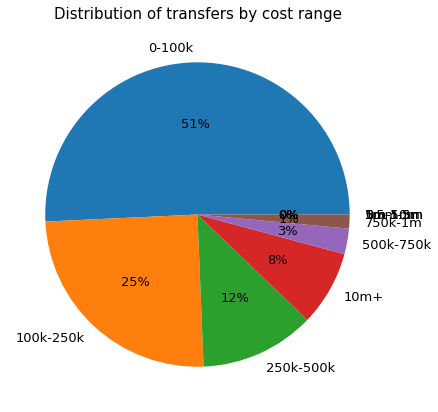

In [16]:
#Creating cost categories
bins = [-np.inf,0, 100000/1e+06, 250000/1e+06, 500000/1e+06, 750000/1e+06,1000000/1e+06,1500000/1e+06,3000000/1e+06,5000000/1e+06,10000000/1e+06 ,np.inf]
names = ['0','0-100k', '100k-250k', '250k-500k', '500k-750k', '750k-1m','1m-1.5m','1.5m-3m','3m-5m','5m-10m','10m+']

plt.figure(figsize=(7,7))
v=pd.cut(df['cost'], bins, labels=names).value_counts()
#print(v)

plt.pie(v, labels=v.index, labeldistance=1.1,autopct='%1.0f%%',textprops={'fontsize': 13});
plt.title("Distribution of transfers by cost range",fontsize=15)

<AxesSubplot:xlabel='cost'>

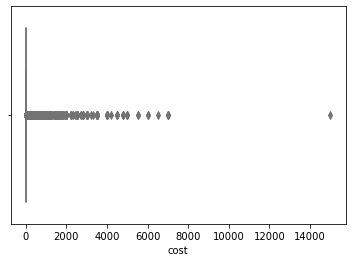

In [17]:
sns.boxplot(data=df,x='cost',palette='rainbow',orient='h') # check outliers of cost

In [18]:
df[df['cost'] >4000].count() # show count of outliers above 4000

position               20
age                    20
origin_club            20
league_origin_club     20
country_origin_club    20
new_club               20
league_new_club        20
country_new_club       20
cost                   20
month                  20
dtype: int64

<AxesSubplot:xlabel='age'>

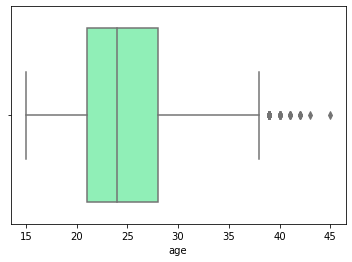

In [19]:
sns.boxplot(data=df,x='age',palette='rainbow',orient='h') # check outliers of age

In [21]:
# drop for cost and age outliers
df.drop(df[df['cost'] >4000].index, inplace = True) 
df.drop(df[df['age'] >40].index, inplace = True)
df.head()

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,month
1,Centre-Forward,25.0,UD Almería,LaLiga,Spain,Real Sociedad,LaLiga,Spain,1800.0,9
3,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,3000.0,9
4,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,1000.0,9
5,Defensive Midfield,27.0,Wolverhampton Wanderers,Premier League,England,Aston Villa,Premier League,England,2800.0,9
6,Centre-Forward,28.0,Stade Rennais FC,Ligue 1,France,OGC Nice,Ligue 1,France,1800.0,9


<AxesSubplot:xlabel='cost'>

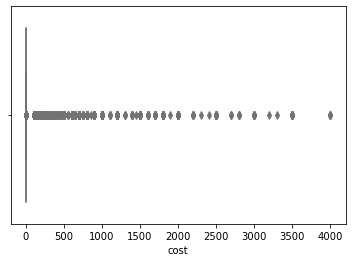

In [21]:
sns.boxplot(data=df,x='cost',palette='rainbow',orient='h') # checking cost After dropping outliers

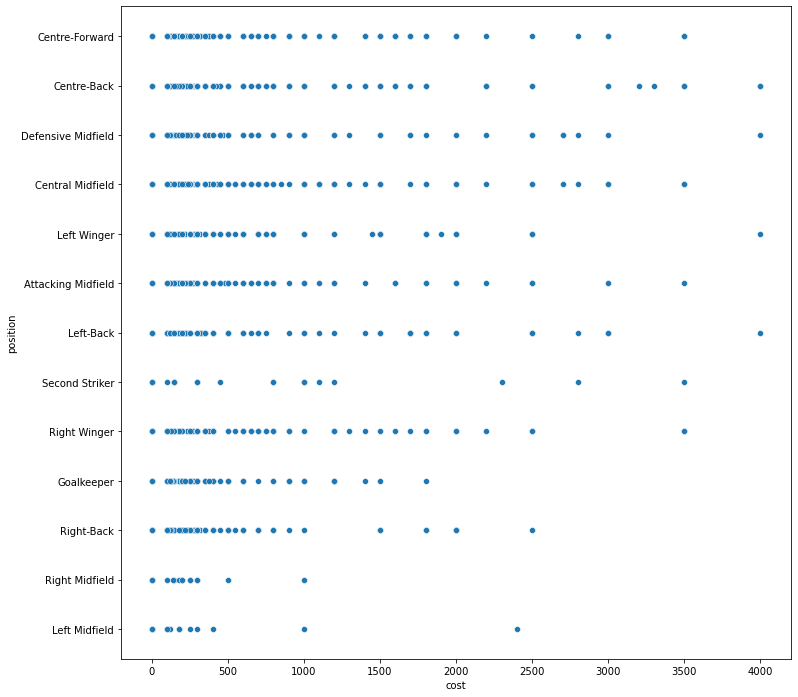

In [22]:
# checking position After dropping outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, y="position", x="cost", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

<AxesSubplot:xlabel='age'>

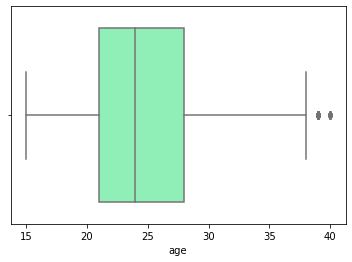

In [23]:
sns.boxplot(data=df,x='age',palette='rainbow',orient='h') # checking age After dropping outliers

In [22]:
df.shape # shape of data after preprocessing

(26994, 10)

<a id='d3'></a>
#### 3) Encoding our data

In [23]:
# Encoding categorical columns 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


to_encode = ['position', 'origin_club', 'new_club', 'league_origin_club','league_new_club', "country_origin_club", "country_new_club"]

for col in to_encode:
    df[col] = encoder.fit_transform(df[col])
    col = {index: label for index, label in enumerate(encoder.classes_)}

df.head()

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,month
1,3,25.0,5124,177,128,4578,191,117,1800.0,9
3,2,27.0,889,66,49,3656,302,39,3000.0,9
4,2,24.0,4921,206,46,3472,302,39,1000.0,9
5,4,27.0,5501,299,38,701,302,39,2800.0,9
6,3,28.0,4923,206,46,4108,221,45,1800.0,9


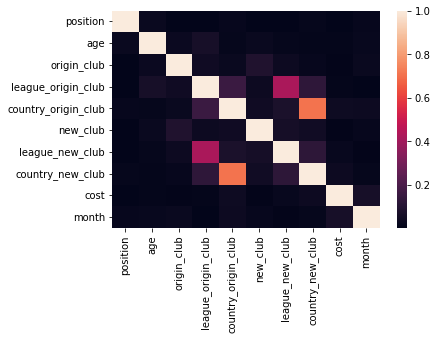

In [24]:
# check of correlation
sns.heatmap(df.corr().abs())
plt.show()

<a id='d4'></a>
#### 4) Scaling our data

In [25]:
df_3 = df.copy()

In [26]:
# Scaling the all data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_3)
df_3.loc[:, :] = scaled_values

df_3.head()

,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,month
1,0.250000,0.40,0.915327,0.389868,0.847682,0.745967,0.415217,0.847826,0.449999,1.0
3,0.166667,0.48,0.158807,0.145374,0.324503,0.595731,0.656522,0.282609,0.749999,1.0
4,0.166667,0.36,0.879064,0.453744,0.304636,0.565749,0.656522,0.282609,0.249998,1.0
5,0.333333,0.48,0.982672,0.658590,0.251656,0.114225,0.656522,0.282609,0.699999,1.0
6,0.250000,0.52,0.879421,0.453744,0.304636,0.669382,0.480435,0.326087,0.449999,1.0


## Splitting data into Training and Testing

In [27]:
from sklearn.model_selection import train_test_split
X=df_3.drop("cost",axis=1)
y=df_3["cost"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0,shuffle=True)
print("x_train shape is:",X_train.shape)
print("x_test shape is:",X_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (18895, 9)
x_test shape is: (8099, 9)
y_train shape is: (18895,)
y_test shape is: (8099,)


<a id='knn1'></a>
## Regression
### Gradient Boosting regression Using scikit-learn

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=300,learning_rate=0.4,random_state=0)
GBR.fit(X_train, y_train)  # Train the model
y_pred = GBR.predict(X_test) # Test the model

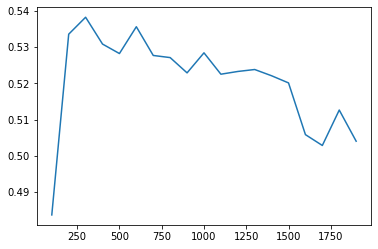

In [33]:
R2 = []

myrange = np.arange(100,2000,100)
for i in myrange:
    GBR = GradientBoostingRegressor(n_estimators=i,learning_rate=0.4)
    GBR.fit(X_train, y_train)
    y_pred = GBR.predict(X_test)
    R2.append(metrics.r2_score(y_test, y_pred ))

#print('R2 score:' , metrics.r2_score(y_test, y_pred ))
plt.figure(figsize=(6, 4))
plt.plot(myrange,R2)

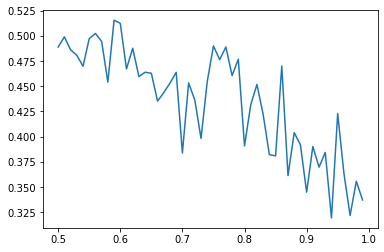

In [34]:
R2 = []

myrange = np.arange(0.5,1,0.01)
for i in myrange:
    GBR = GradientBoostingRegressor(n_estimators=300,learning_rate=i)
    GBR.fit(X_train, y_train)
    y_pred = GBR.predict(X_test)
    R2.append(metrics.r2_score(y_test, y_pred ))

#print('R2 score:' , metrics.r2_score(y_test, y_pred ))
plt.figure(figsize=(6, 4))
plt.plot(myrange,R2)

## Evaluation with R2 score

In [30]:
# Evaluation of the model
print('R2 score:' , metrics.r2_score(y_test, y_pred ))

<IPython.core.display.Javascript object>

R2 score: 0.539110928794966
